In [1]:
#NPV Rule - Net Present Value to understand the profitability of an investment
import numpy_financial as npf

cash_flows = [-100000, 40000, 50000, 60000]
discount_rate = 0.10

npv = npf.npv(discount_rate, cash_flows)
print(f"NPV: ${npv:,.2f}")  # Output: $22,765.40

NPV: $22,764.84


In [8]:
#IRR Rule - Internal Rate of Return to evaluate the profitability of an investment
import numpy_financial as npf

cash_flows = [-100000, 40000, 50000, 60000]
irr = npf.irr(cash_flows)
print(f"IRR: {irr*100:.2f}%")  # Output: 22.47%

positive_cfs = [40000, 50000, 60000]
negative_cf = -100000
finance_rate = 0.08  # Borrowing rate
reinvest_rate = 0.10  # Cost of capital

mirr = npf.mirr(cash_flows, finance_rate, reinvest_rate)
print(f"MIRR: {mirr*100:.2f}%")  # Output: 19.05%

IRR: 21.65%
MIRR: 17.78%


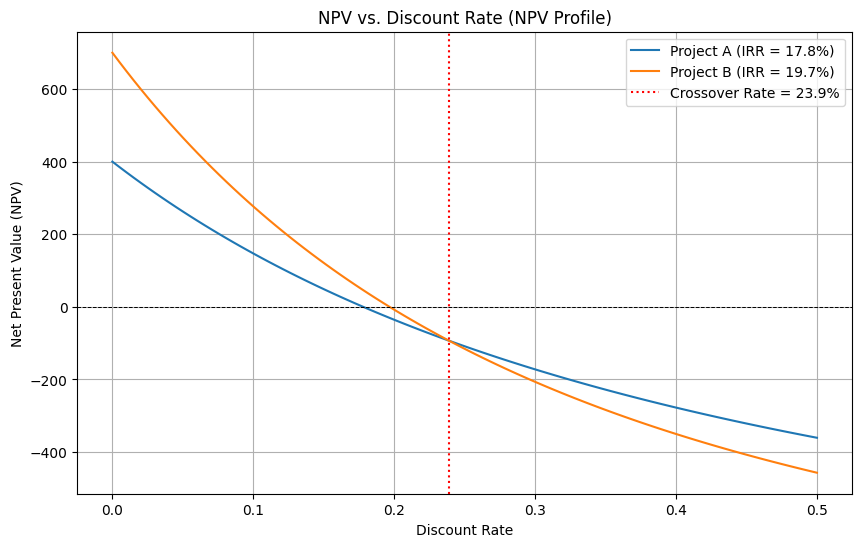

In [6]:
#NPV vs IRR
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

# Define cash flows for two projects
cf_project_A = [-1000, 500, 400, 300, 200]  # Higher short-term cash flows
cf_project_B = [-1000, 200, 300, 400, 800]  # Higher long-term cash flows

# Calculate NPVs across discount rates (0% to 50%)
discount_rates = np.linspace(0, 0.5, 100)
npv_A = [npf.npv(rate, cf_project_A) for rate in discount_rates]
npv_B = [npf.npv(rate, cf_project_B) for rate in discount_rates]

# Find IRRs
irr_A = npf.irr(cf_project_A)
irr_B = npf.irr(cf_project_B)

# Find crossover rate (where NPV_A = NPV_B)
from scipy.optimize import fsolve
def npv_diff(rate):
    return npf.npv(rate, cf_project_A) - npf.npv(rate, cf_project_B)
crossover_rate = fsolve(npv_diff, 0.1)[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(discount_rates, npv_A, label=f'Project A (IRR = {irr_A*100:.1f}%)')
plt.plot(discount_rates, npv_B, label=f'Project B (IRR = {irr_B*100:.1f}%)')

# Highlight key points
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(crossover_rate, color='red', linestyle=':', 
            label=f'Crossover Rate = {crossover_rate*100:.1f}%')

plt.title('NPV vs. Discount Rate (NPV Profile)')
plt.xlabel('Discount Rate')
plt.ylabel('Net Present Value (NPV)')
plt.legend()
plt.grid(True)
plt.show()

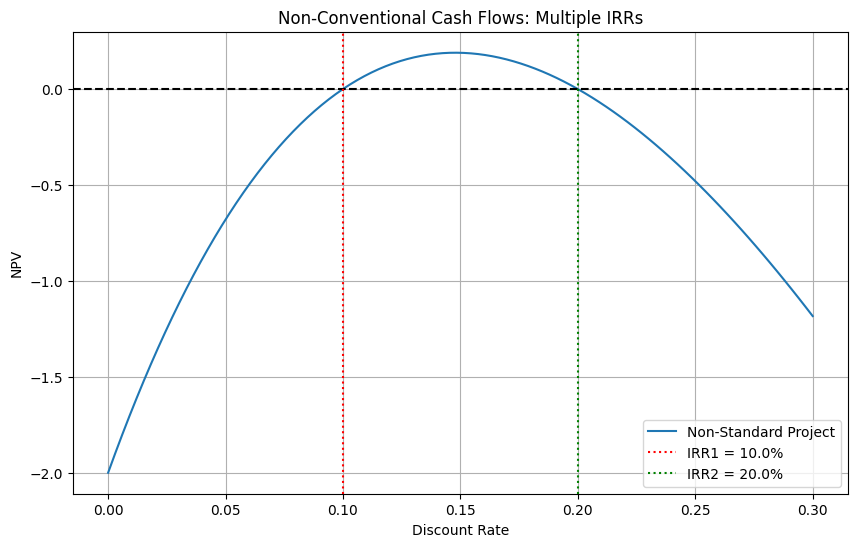

Found IRRs: 10.000%, 20.000%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf
from scipy.optimize import root

# Project with non-conventional cash flows (multiple IRRs)
cf_non_standard = [-100, 230, -132]  # Initial outflow, then inflow, then outflow

# Calculate NPV across rates for plotting
rates = np.linspace(0, 0.3, 100)
npv_ns = [npf.npv(rate, cf_non_standard) for rate in rates]

# Corrected function to find IRR roots
def npv_equation(rate):
    return sum(cf / (1 + rate)**t for t, cf in enumerate(cf_non_standard))

# Find multiple IRRs
solutions = root(lambda x: [npv_equation(x[0]), npv_equation(x[1])], [0.1, 0.2])  
irr1, irr2 = solutions.x[0], solutions.x[1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rates, npv_ns, label='Non-Standard Project')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(irr1, color='red', linestyle=':', label=f'IRR1 = {irr1*100:.1f}%')
plt.axvline(irr2, color='green', linestyle=':', label=f'IRR2 = {irr2*100:.1f}%')

plt.title('Non-Conventional Cash Flows: Multiple IRRs')
plt.xlabel('Discount Rate')
plt.ylabel('NPV')
plt.legend()
plt.grid(True)
plt.show()

print(f"Found IRRs: {irr1:.3%}, {irr2:.3%}")

In [16]:
#Elsaticity Analysis


def calculate_npv(cash_flows, discount_rate):
    """Calculate NPV given cash flows and discount rate."""
    return sum(cf / (1 + discount_rate)**t for t, cf in enumerate(cash_flows))

def elasticity(npv_base, npv_new, param_base, param_new):
    """Calculate elasticity of NPV to a parameter."""
    pct_change_npv = (npv_new - npv_base) / npv_base
    pct_change_param = (param_new - param_base) / param_base
    return pct_change_npv / pct_change_param

# Base Case
cash_flows = [-1000, 400, 400, 400]  # Initial investment + 3 years of cash flows
discount_rate_base = 0.10
npv_base = calculate_npv(cash_flows, discount_rate_base)

# Scenario: Discount rate increases by 10% (to 11%)
discount_rate_new = 0.11
npv_new = calculate_npv(cash_flows, discount_rate_new)

# Compute elasticity
elasticity = elasticity(npv_base, npv_new, discount_rate_base, discount_rate_new)
print(f"Elasticity of NPV to discount rate: {elasticity:.2f}")


Elasticity of NPV to discount rate: 32.81


#Types of Sensitivity Analysis

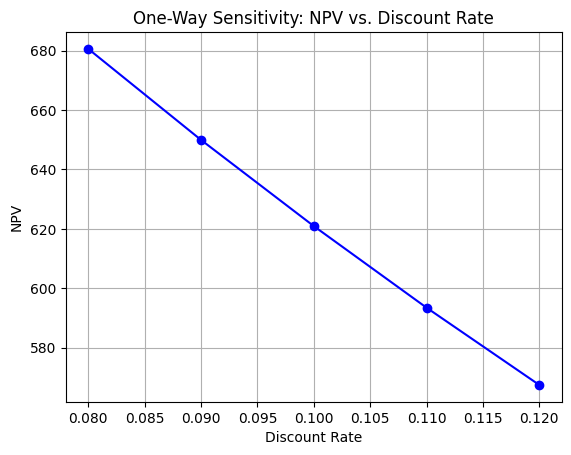

In [17]:
#1.One-Way Sensitivity Analysis
import numpy as np
import matplotlib.pyplot as plt

discount_rates = np.linspace(0.08, 0.12, 5)
npvs = [1000 / (1 + r)**5 for r in discount_rates]  # Example NPV calculation

plt.plot(discount_rates, npvs, 'bo-')
plt.title("One-Way Sensitivity: NPV vs. Discount Rate")
plt.xlabel("Discount Rate")
plt.ylabel("NPV")
plt.grid(True)
plt.show()

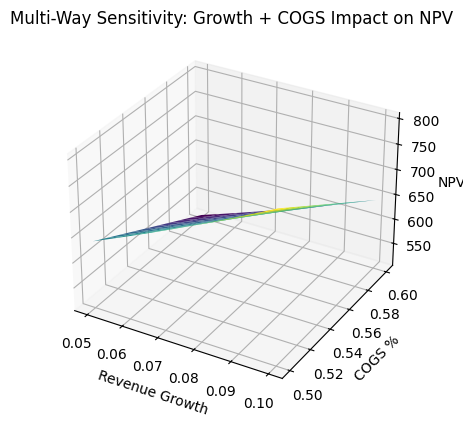

In [18]:
#Multi-Way Sensitivity Analysis
from mpl_toolkits.mplot3d import Axes3D

growth_rates = np.linspace(0.05, 0.10, 10)
cogs_pct = np.linspace(0.50, 0.60, 10)
G, C = np.meshgrid(growth_rates, cogs_pct)
NPV = 1000 * (1 + G)**5 * (1 - C)  # Simplified NPV model

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(G, C, NPV, cmap='viridis')
ax.set_xlabel("Revenue Growth")
ax.set_ylabel("COGS %")
ax.set_zlabel("NPV")
plt.title("Multi-Way Sensitivity: Growth + COGS Impact on NPV")
plt.show()

In [19]:
#Scenario Analysis
scenarios = {
    "Base": {"growth": 0.05, "rate": 0.10},
    "Recession": {"growth": 0.02, "rate": 0.12},
    "Boom": {"growth": 0.08, "rate": 0.08}
}

for name, params in scenarios.items():
    npv = 1000 * (1 + params["growth"])**5 / (1 + params["rate"])**5
    print(f"{name} Case NPV: ${npv:.2f}")

Base Case NPV: $792.47
Recession Case NPV: $626.49
Boom Case NPV: $1000.00


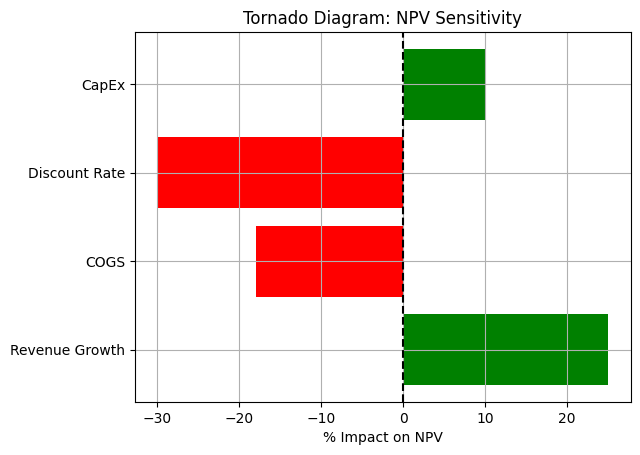

In [20]:
#Tornado Diagrams
variables = ["Revenue Growth", "COGS", "Discount Rate", "CapEx"]
impacts = [25, -18, -30, 10]  # % change in NPV from ±10% input change

plt.barh(variables, impacts, color=['red' if x < 0 else 'green' for x in impacts])
plt.title("Tornado Diagram: NPV Sensitivity")
plt.xlabel("% Impact on NPV")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

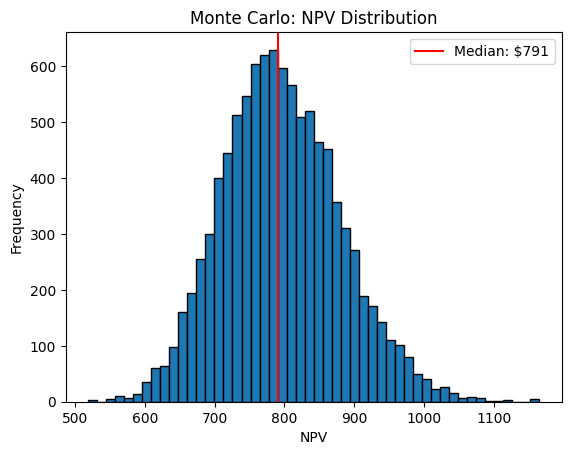

In [21]:
#Monte Carlo Simulation
np.random.seed(42)
n_simulations = 10_000
growth_sim = np.random.normal(0.05, 0.02, n_simulations)  # Mean 5%, SD 2%
rate_sim = np.random.normal(0.10, 0.01, n_simulations)   # Mean 10%, SD 1%
npv_sim = 1000 * (1 + growth_sim)**5 / (1 + rate_sim)**5

plt.hist(npv_sim, bins=50, edgecolor='black')
plt.axvline(np.median(npv_sim), color='red', label=f"Median: ${np.median(npv_sim):.0f}")
plt.title("Monte Carlo: NPV Distribution")
plt.xlabel("NPV")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [22]:
#Break-Even Sensitivity
from scipy.optimize import fsolve

def npv_break_even(growth):
    return 1000 * (1 + growth)**5 / (1.10)**5 - 1000  # NPV = 0

growth_breakeven = fsolve(npv_break_even, 0.05)[0]
print(f"Break-Even Growth Rate: {growth_breakeven:.2%}")

Break-Even Growth Rate: 10.00%


Key Takeaways
Type	                         When to Use	                         Strengths
One-Way	                    Isolating top drivers	               Simple, clear visualization
Multi-Way	                    Analyzing interactions	               Captures combined effects
Scenario Analysis	          Stress-testing	                         Real-world condition modeling
Tornado Diagrams	          Prioritizing variables	               Quick ranking of sensitivities
Monte Carlo	               Probabilistic outcomes	               Quantifies risk
Break-Even	               Viability thresholds	               Sets performance benchmarks
